<a href="https://colab.research.google.com/github/jamunozlab/introductory_mechanics_fall_2023/blob/main/exercises/Phys_2320_exercise_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

A force is called [*conservative*](https://en.wikipedia.org/wiki/Conservative_force) if the work done by the force is independent of the path taken by the force. Gravity is an example of a conservative force: when you lift a box from the ground and then drop it, the velocity of the box just before hitting the ground depends only on the height from which you drop the box. If you lift it, walk forward 10 meters, and drop it, the velocity will be the same than if you don't walk but drop it from the same height.

.

There are other forces in that scenario that are non-conservative. For example, you must [contract and relax your muscles](https://en.wikipedia.org/wiki/Muscle_contraction) to lift and drop the object. This will make your muscle fibers slide past each other, producing friction, which as you learned in the previous workshop, is a non-conservative force. To keep the muscle fibers in a contracted position, you need certain proteins to convert potential energy (stored in [adenosine triphosphate](https://en.wikipedia.org/wiki/Adenosine_triphosphate)) into kinetic energy (muscle movement). When the proteins are depleted from potential energy, your muscles get tired.

.

A very nice property of conservative forces is that the following is true:

.

$\vec{F}_{\rm cons} = - \frac{dU}{dx} \hat{i}$ .

.

It is easy to see why: $\int\vec{F}_{\rm cons} \cdot d\vec{x} = \int\vec{F}_{\rm cons}  \cos\theta_{F,x} d\vec{x} = - \int dU = -\Delta U$. This tells you that work is done when the potential energy decreases, or vice versa, that work must be done to increase the potential energy. When you drop the box, the gravitational potential energy of the box decreases, gravity performs work on the box, increasing its kinetic energy.

## A generalized oscillator

You have worked on damped harmonic oscillators, and on plain harmonic ones. You have manipulated a molecular dynamics code that applies the kinematic equations at discrete, finite instants, to simulate mechanical systems. You are now quite the expert in all things oscillators. But there is one more super power you can acquire: rather than being limited by the boring Hooke's Law, which was hard-coded into the code, now you will leverage the relationship between the force and the derivative of the potential energy with respect to position to simulate the dynamics of a system with an arbitrary potential. For this particular situation, we will not consider friction.

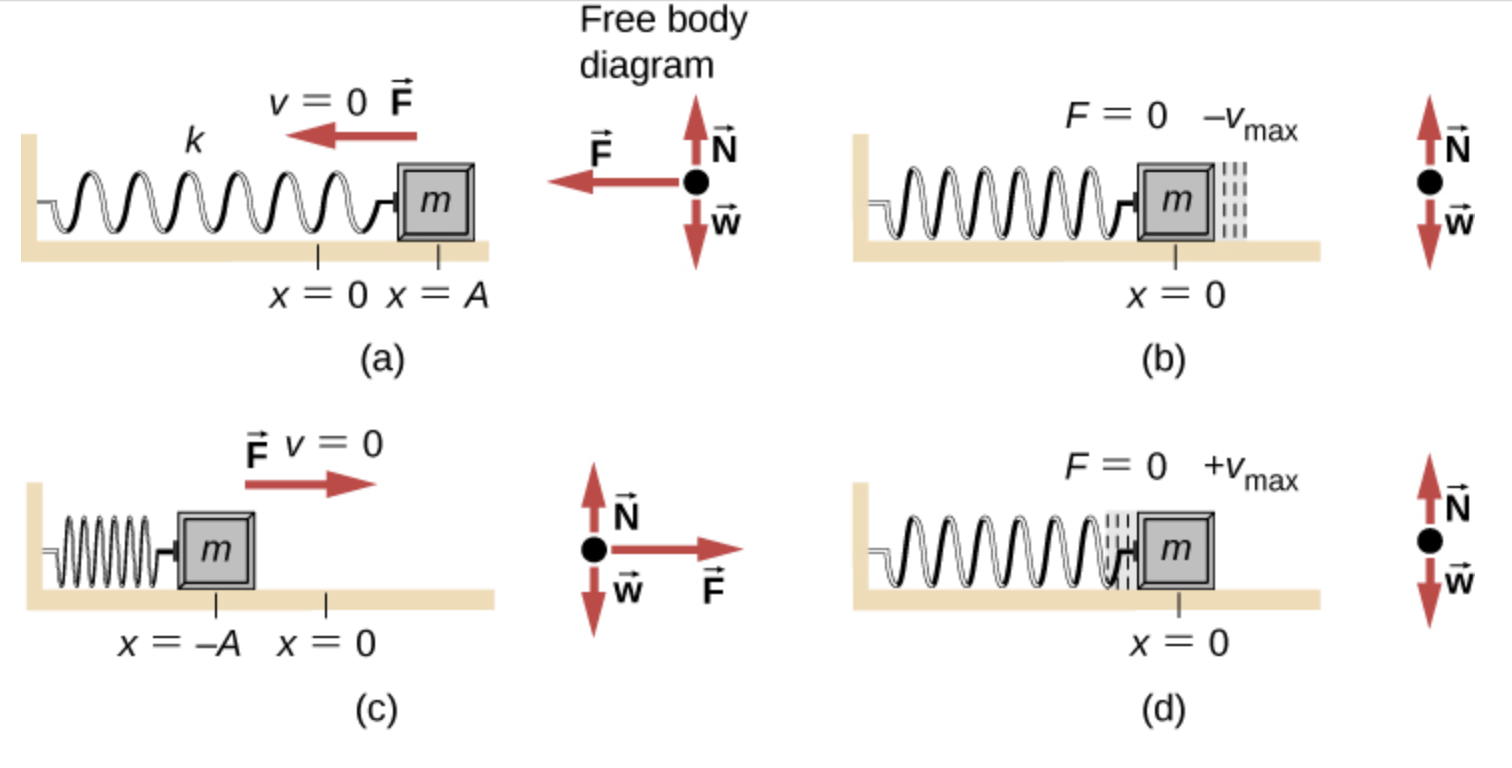

# Instructions

1. Evaluate Jupyter cells if required.

2. Complete the exercises below.

3. Answer the questions in the space provided.

For this exercise, you will combine the main concepts that you have learned so far in this class: kinematic equations, forces, and conservation of energy. And this time, you will get to plug in an arbitrary potential. You will simulate a **mass of $m=1$ kg** attached to a one-dimensional spring of **spring constant $k=1$ N/m** oscillating about its equilibrium position:

* The **equilibrium position will be $x_0 = 0$ m and at time $t=0$ s**,

*  The mass will be at its equilibrium and will be moving to the right at a **Velocity of $v=1$ m/s**.

* Since the **Spring force $F_s=0$** at the equilibrium position, the **acceleration at $t=0$ is $a=0$ m/s$^2$**.

To begin, we must first set these initial conditions by giving appropriate values to the python variables. We will start with the Hooke's Law potential $U_{\rm s} = \frac{1}{2}k (\Delta \vec{x})^2$

In [1]:
# Make our lives easier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialization
position = 0.0 # position in meters
velocity = 1.0 # velocity in meters per second
acceleration = 0.0 # acceleration in meters per second^2
force = 0.0 # force in Newtons
time = 0.0 # time in seconds
spring_constant = 1.0 # force constant in kg/second^2
mass = 1.0 # mass in kg
time_step = 0.001 # time step in seconds
g = 9.8 # acceleration due to gravity m/s^2
mu = 0.000 # coefficient of kinetic friction

* The following *molecular dynamics* code uses the kinematic equations to continually update the position, velocity and; by taking the derivative of the given potential, the force exerted on our mass, and it's acceleration.

* The kinematic equations arise from integrating the equations of motion with constant acceleration, which does not occur in the case of the mass/spring system since the force (and hence the acceleration) is a function of the displacement.

* Nevertheless, the acceleration is constant if the time step we consider is infinitesimally small. A computer can approximate this by using very small time steps. For our simulation, a time step $\Delta t = 0.01$ s produces good results. The results are plotted below the code.

In [ ]:
# A quadratic model for potential, this is just Hooke's law
# THIS IS THE CODE CELL THAT WILL BE REPLACED TO COMPLETE EXERCISE 2

potential_series = pd.Series([(1/2)*spring_constant*(x/100)**2 for x in range(-125,125)], index=[x/100 for x in range(-125,125)]) # ΔX ranges from -1.25 m to + 1.25 m // Arbitrary approximation
potential_series.plot(xlabel="position (m)", ylabel="Spring potential energy (J)")  # U = (1/2)k(Δx)2

print (potential_series) # Prints the Position values in the left column and Potential values in the right column

## Derivative of a the function described by a pandas series

The python function below calculates the force felt by a particle moving in a potential energy field by approximating the derrivative of potential with respect to position $\frac{dU}{dx}$.

This function receives two arguments:
1. The `potential_series` is a pandas series in which the position is given by the index and the potential energy by the values.

2. The `position` is the value of the position where the derivative will be taken, or explained in a different way, the place where the force is to be predicted.


If you are curius, the python function calculates the derivative of the potential energy at the chosen position using what is known as the *Central Difference Method* which you probably learned in your Calculus I course.

## Central Difference Method

1. Iterates through the index of the potential_series and finds the position closest to the user specified position.

2. The difference between the given position and the closest position is then stored in the variable `diff`, which is defined as the difference between values at two points in the series that are "closest" from the the given position.

3. The closest "position" is then stored in the variable `closest`.

4. The program then uses `closest` to approximate the *rise* and *run* of the function of potential over time.

5. Finally, the program approximates the derrivative by dividing the rise by the run and returns the result.

In [4]:
# Take the derivative of a pandas series at a given position using central difference

def take_derivative_at(potential_series, position):
  diff = np.inf  #Infinity
  closest = 0
  for index, pos in enumerate(potential_series.index): #position at each index is enumerated
    if abs(position - pos) < diff: # this IF will always execute the first iteration
      diff = abs(position - pos)
      closest = index # Closest = 0
  rise = potential_series.iloc[closest+1] - potential_series.iloc[closest-1]  #  ΔU = - Uf - Ui
  run = potential_series.index[closest+1] - potential_series.index[closest-1] # Δx = xf - xi
  slope = rise/run # ΔU / Δx

  return slope

In [ ]:
# Does it give reaasonable values?
take_derivative_at(potential_series=potential_series, position=-0.66)

In [ ]:
# Does it give reaasonable values?
take_derivative_at(potential_series=potential_series, position=0.33)

### Note

Notice that in the code below, the only thing that is different with respect to previous versions, is how the value of the variable `spring_force` is computed.

In [7]:
# Now that we've calculated Spring Force by approximating the derrivative of potential with respect to position (dU/dx)
# We can use Kinematics and Newtons second law to approximate the values of our remaining variables.

# Creating variable arrays
time_list = [time]
position_list = [position]
velocity_list = [velocity]
acceleration_list = [acceleration]
force_list = [force]

# Starting Loop
i=1
while i < 200000:
    time = time + time_step
    position = position + velocity*time_step + (1/2)*(acceleration*time_step**2) #Xf = xi + v(Δt)
    velocity = velocity + acceleration*time_step #Vf = Vi + a(Δt)
    spring_force = -1*take_derivative_at(potential_series=potential_series, position=position)  #Fs = -kΔx

    if velocity < 0: # moving to the left
      friction_force = mu*mass*g #friction to the right
    else: # moving to the right
      friction_force = -mu*mass*g # friction to the left
                                                             # We set the coefficient of friction to Zero, so friction will not affect
    if abs(velocity) < 0.001: # if moving extremely slowly
      friction_force = 0 # no friction because almost not moving

    force = spring_force + friction_force # Fnet = Fs + Fk
    acceleration = force/mass

# After all calculations have been computed they are then stored into our variable arrays

    time_list.append(time)
    position_list.append(position)
    velocity_list.append(velocity)
    acceleration_list.append(acceleration)
    force_list.append(force)
    i = i + 1

In [ ]:
position_series = pd.Series(position_list, index=time_list)
position_series.plot(ylabel="position (m)", xlabel="time (s)", xlim=(0, 20))

In [ ]:
velocity_series = pd.Series(velocity_list, index=time_list)
velocity_series.plot(ylabel="velocity (m/s)", xlabel="time (s)", xlim=(0, 20))

In [ ]:
acceleration_series = pd.Series(acceleration_list, index=time_list)
acceleration_series.plot(ylabel="acceleration (m/s^2)", xlabel="time (s)", xlim=(0, 20))

In [ ]:
force_series = pd.Series(force_list, index=time_list)
force_series.plot(ylabel="force (N)", xlabel="time (s)", xlim=(0, 20))

In [ ]:
phase_series = pd.Series(velocity_series.values, index=position_series.values)
phase_series.plot(xlabel="position (m)", ylabel="velocity (m/s)", figsize=(5,5))



* The mass has maximum velocity $v_{\rm max}$ at the equilibrium position, whereas the velocity is zero at the maximum displacement on either side $|x_{\rm max}|= A$.

* Since the kinetic energy is $K = \frac{1}{2}mv^2$ and the spring potential energy is $U = \frac{1}{2}k \Delta x^2$, the kinetic energy is maximum at the equilibrium position (where the potential energy is zero) and the potential energy is maximum at the position extrema (where the kinetic energy is zero).

* Since energy is conserved in an isolated system, the nature of the energy in the mass/spring harmonic motion system is always oscillating between kinetic and potential.


## Exercise 11.1

 11.1.1. How do the results using this version of the code (creating a potential and using the derivative of the potential at a point to compute the force) compare to the previous version of the code used in our previous exercises (When the force was explicitely in the molecular dynamics code)? Explain for the position, velocity, acceleration, phase diagram.


In [ ]:
## 11.1.1 How do 𝑥(𝑡) , 𝑣(𝑡) , 𝑎(𝑡), 𝑣(𝑥) computed in Workshop 9 and Workshop 11 compare? Why do you think this is?
##
## Answer 𝑥(𝑡):
## Answer 𝑣(𝑡):
## Answer 𝑎(𝑡):
## Answer 𝑣(𝑥):

# Quartic oscillator

In this second instance,
* The mass will be attached to a one-dimensional spring with a [quartic](https://en.wikipedia.org/wiki/Quartic_function) potential (rather than quadratic) with a spring constant $k=1$ N/m oscillating about its equilibrium position.

* The equilibrium position will be $x_0 = 0$ m and at time $t=0$ s, the mass will be at its equilibrium and will be moving to the right at $v=1$ m/s.

* Since the spring force is zero at the equilibrium position. The potential of a $quartic$ $spring$ in this iteration is:

.

* $U_{\rm q} = \frac{1}{2} \left[ k (\Delta \vec{x})^2 \right]^2 -  \left[ \frac{1}{2}k (\Delta \vec{x})^2 \right]$


.

You can find the generating code in the cell below.

In [ ]:
potential_series = pd.Series([(1/2)*spring_constant*(x/100)**4 - (1/2)*spring_constant*(x/100)**2 for x in range(-150,150)], index=[x/100 for x in range(-150,150)])
potential_series.plot(xlabel="position (m)", ylabel="Spring potential energy (J)")

# Exercise 11.2

Copy and paste the code cell above that calculates the computational model for the potential force in a $quartic$ $spring$ $system$, use this to replace the $quadratic$ $model$ $for$ $spring$ $potential$, then re-execute all the code cells.

11.2.1. How does this model of the $quartic$ $spring$ compare to the first instance of our Harmonic oscilator?
 What happens to $x(t)$, $v(t)$, and $a(t)$? Explain in terms of the potential.

In [ ]:
## 11.1.2 How do 𝑥(𝑡) , 𝑣(𝑡) , 𝑎(𝑡), 𝑣(𝑥) computed with the quadratic and quartic potentials compare? Why do you think this is?
##
## Answer 𝑥(𝑡):
## Answer 𝑣(𝑡):
## Answer 𝑎(𝑡):
## Answer 𝑣(𝑥):